In [1]:
import numpy as np
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt


In [2]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 45

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE) 
plt.rc('figure', titlesize=BIGGER_SIZE)

In [5]:
warnings.filterwarnings("ignore")
get_ipython().run_line_magic('matplotlib', 'inline')

In [6]:
import requests
furl = 'https://spotleai.sgp1.digitaloceanspaces.com/course/data/tweets_bollywood.txt'
response = requests.get(furl)
tweets = response.text.split("\n")

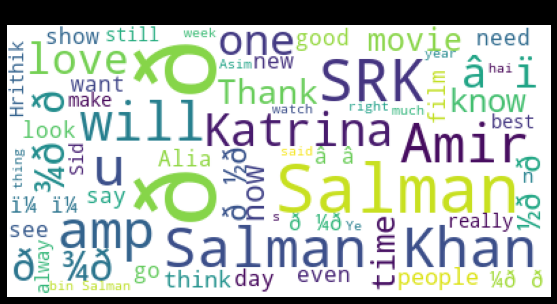

In [7]:
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(max_words=60,background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")
word_cloud(tweets)


<AxesSubplot:xlabel='Top trending Tweets'>

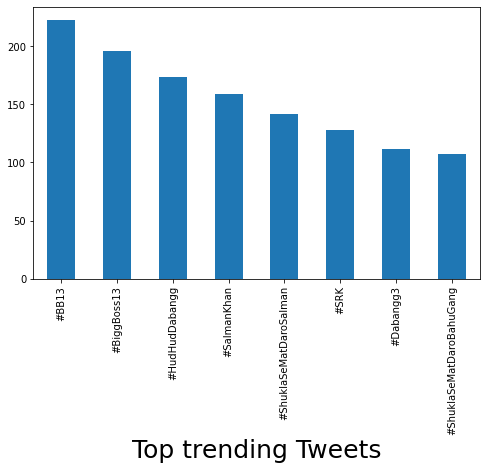

In [8]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j) for j in [i for i in raw.split() if i.startswith("#")]]
df = pd.DataFrame({"hashtag": tags})
fig, ax = plt.subplots()
plt.xlabel('Top trending Tweets')
df['hashtag'].value_counts().head(8).plot(ax=ax, kind='bar',figsize=(8,5))


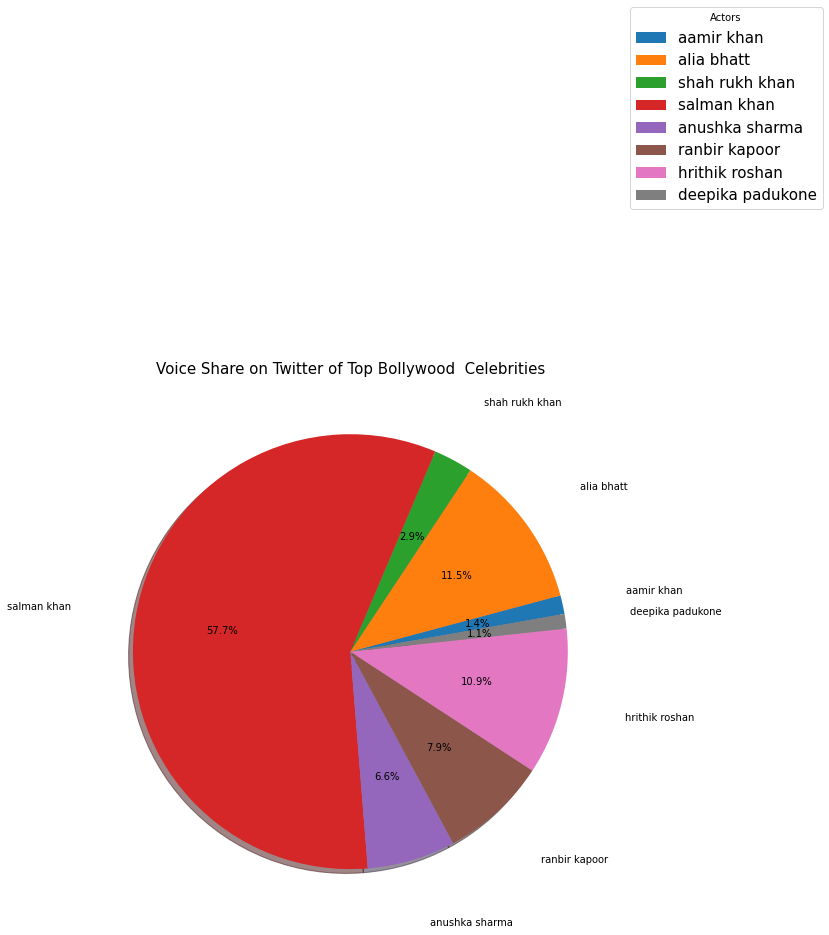

In [9]:
actors = ['aamir khan','alia bhatt','shah rukh khan','salman khan','anushka sharma','ranbir kapoor','hrithik roshan','deepika padukone']
tweets=str(tweets)
tweets=tweets.lower()
counts=[]
for i in actors:
    var=(tweets.count(i))
    counts.append(var)
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(counts,
        labels=actors,
        startangle=10,
        shadow='true',
        autopct='%1.1f%%',
        labeldistance=1.3,
)
ax.set_title('Voice Share on Twitter of Top Bollywood  Celebrities')
ax.legend(title="Actors",
          loc="center left",
          bbox_to_anchor=(1, 1, 0, 1))
plt.show()